In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px

In [231]:
data = pd.read_csv("house_prices.csv")

In [232]:
data.info()
data.dropna()
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].apply(lambda x: x.timestamp())
print(data.columns)
print(data.dtypes)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

       city  median_waterfront  median_non_waterfront
0   Seattle          1765000.0               640000.0
1    Renton                0.0               417000.0
2  Bellevue          4881250.0               799000.0
3   Redmond                NaN               700000.0
4  Issaquah          2200000.0               639888.0


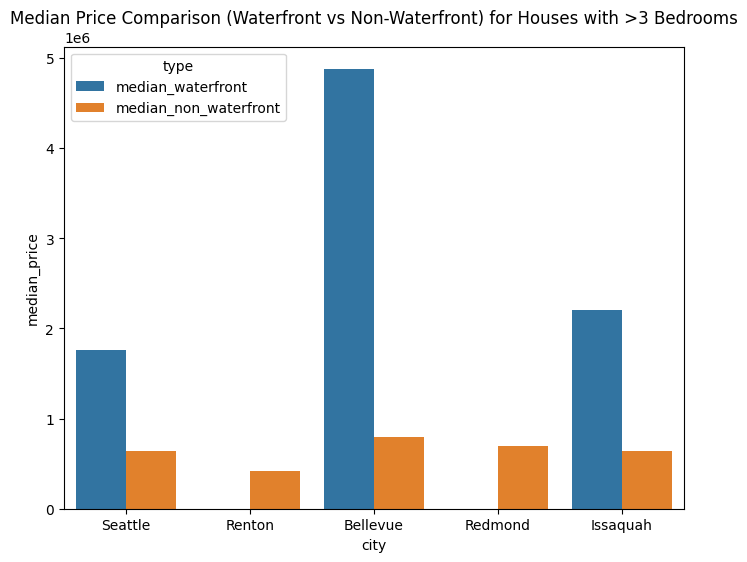

In [233]:
# Hypothesis: Waterfront (>3 bedrooms) vs Non-waterfront (>3 bedrooms) median price across cities.
top_cities = data['city'].value_counts().head(5).index

price_comparison = []

for city in top_cities:
    city_df = data[data['city']==city]
    med_waterfront = city_df[(city_df['waterfront']==1) & (city_df['bedrooms']>3)]['price'].median()
    med_non_waterfront = city_df[(city_df['waterfront']==0) & (city_df['bedrooms']>3)]['price'].median()
    price_comparison.append([city, med_waterfront, med_non_waterfront])

comparison_df = pd.DataFrame(price_comparison, columns=['city', 'median_waterfront', 'median_non_waterfront'])
print(comparison_df)

# Plot to visually compare
comparison_melted = comparison_df.melt(id_vars='city', value_vars=['median_waterfront','median_non_waterfront'], var_name='type', value_name='median_price')

plt.figure(figsize=(8,6))
sns.barplot(x='city', y='median_price', hue='type', data=comparison_melted)
plt.title("Median Price Comparison (Waterfront vs Non-Waterfront) for Houses with >3 Bedrooms")
plt.show()

In [234]:
data['last_changed'] = data[['yr_built', 'yr_renovated']].max(axis=1)
data['price_per_sqft_liv'] = data['price'] / data['sqft_living']
data = data[['date', 'price', 'bedrooms', 'bathrooms','sqft_living', 'price_per_sqft_liv', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'last_changed']]
data.view.value_counts()

view
0    4140
2     205
3     116
4      70
1      69
Name: count, dtype: int64

In [235]:
print("Price stats:",data['price'].describe())

price_mean = df['price'].mean()
price_median = df['price'].median()
price_std = df['price'].std()

print("Price - mean:", price_mean, "median:", price_median, "std:", price_std)



Price stats: count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64
Price - mean: 551962.9884732141 median: 460943.46153850004 std: 563834.7025471414


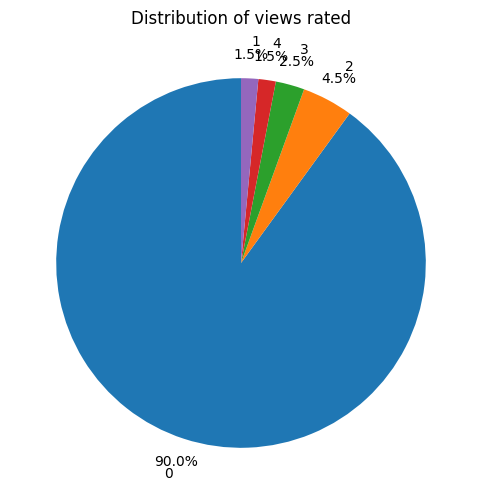

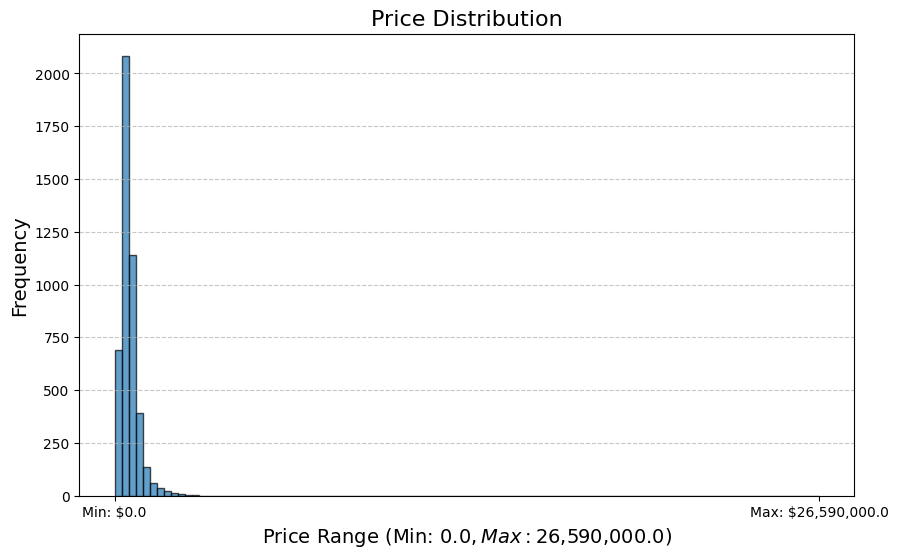

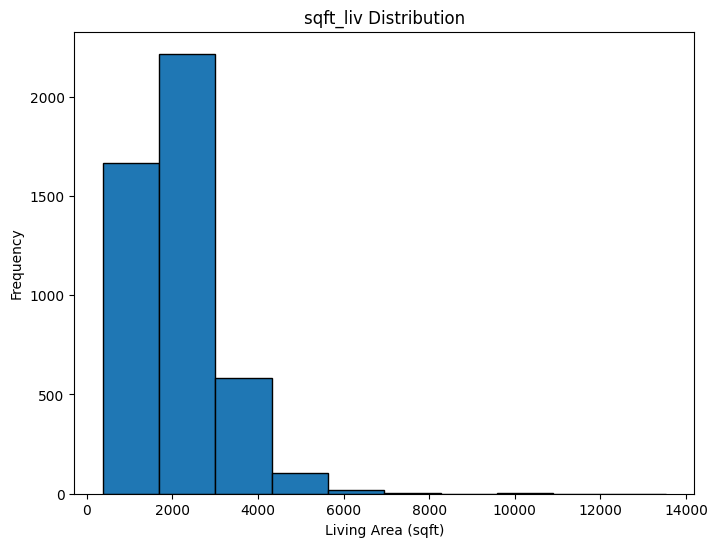

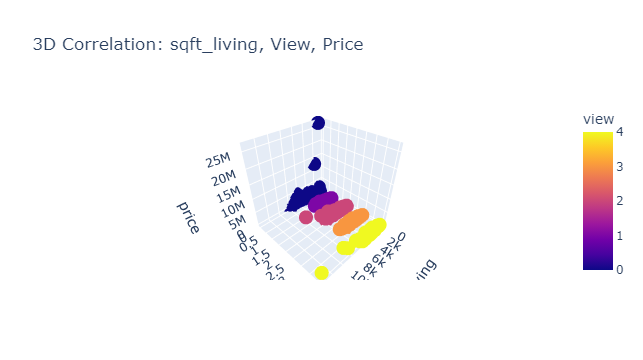

In [236]:
# 1. Pie Chart for 'View'
view_counts = data['view'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(view_counts, labels=view_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=1.13, labeldistance=1.2)
plt.title('Distribution of views rated')
plt.show()

# 2. Price Distribution
min_price = data['price'].min()
max_price = data['price'].max()

# Plot the Price Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=100, edgecolor='black', alpha=0.7)
plt.title('Price Distribution', fontsize=16)
plt.xlabel(f'Price Range (Min: ${min_price:,}, Max: ${max_price:,})', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(ticks=[min_price, max_price], labels=[f'Min: ${min_price:,}', f'Max: ${max_price:,}'])
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional grid for better readability
plt.show()

# 3. sqft_liv Distribution
plt.figure(figsize=(8, 6))
plt.hist(data['sqft_living'], bins=10, edgecolor='black')
plt.title('sqft_liv Distribution')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Frequency')
plt.show()


fig = px.scatter_3d(data, 
                    x='sqft_living', 
                    y='view', 
                    z='price', 
                    color='view', 
                    title='3D Correlation: sqft_living, View, Price',
                    labels={'price_per_sqft_liv': 'Price per sqft (Living)', 'View': 'View', 'Price': 'Price'})
fig.show()

In [237]:
from sklearn.model_selection import train_test_split

x = data.drop(['price'], axis = 1)
y = data['price']

In [238]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [239]:
train_data = x_train.join(y_train)
train_data

,date,bedrooms,bathrooms,sqft_living,price_per_sqft_liv,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,last_changed,price
2194,1.402358e+09,6.0,1.50,1930,90.673575,8400,1.0,0,0,3,1030,900,1971,175000.0
752,1.400112e+09,3.0,2.50,1700,205.852941,7496,2.0,0,0,3,1700,0,1994,349950.0
2740,1.403050e+09,4.0,1.75,1980,359.090909,10800,1.0,0,0,5,990,990,1985,711000.0
4366,1.399421e+09,3.0,3.00,1680,196.428571,1570,3.0,0,0,3,1680,0,2014,330000.0
3002,1.403222e+09,4.0,3.50,4410,299.319728,36200,2.0,0,0,3,4410,0,1989,1320000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,1.404086e+09,4.0,2.50,3670,258.855586,7680,2.5,0,0,3,3670,0,2007,950000.0
955,1.400544e+09,4.0,2.75,2050,234.146341,3960,1.0,0,0,4,1180,870,1986,480000.0
2383,1.402531e+09,3.0,2.50,1250,384.000000,1103,3.0,0,2,3,1250,0,2005,480000.0
149,1.399248e+09,2.0,2.50,1590,263.641509,1426,2.0,0,0,3,1590,0,2014,419190.0


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'price_per_sqft_liv'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'last_changed'}>, <Axes: >, <Axes: >]],
      dtype=object)

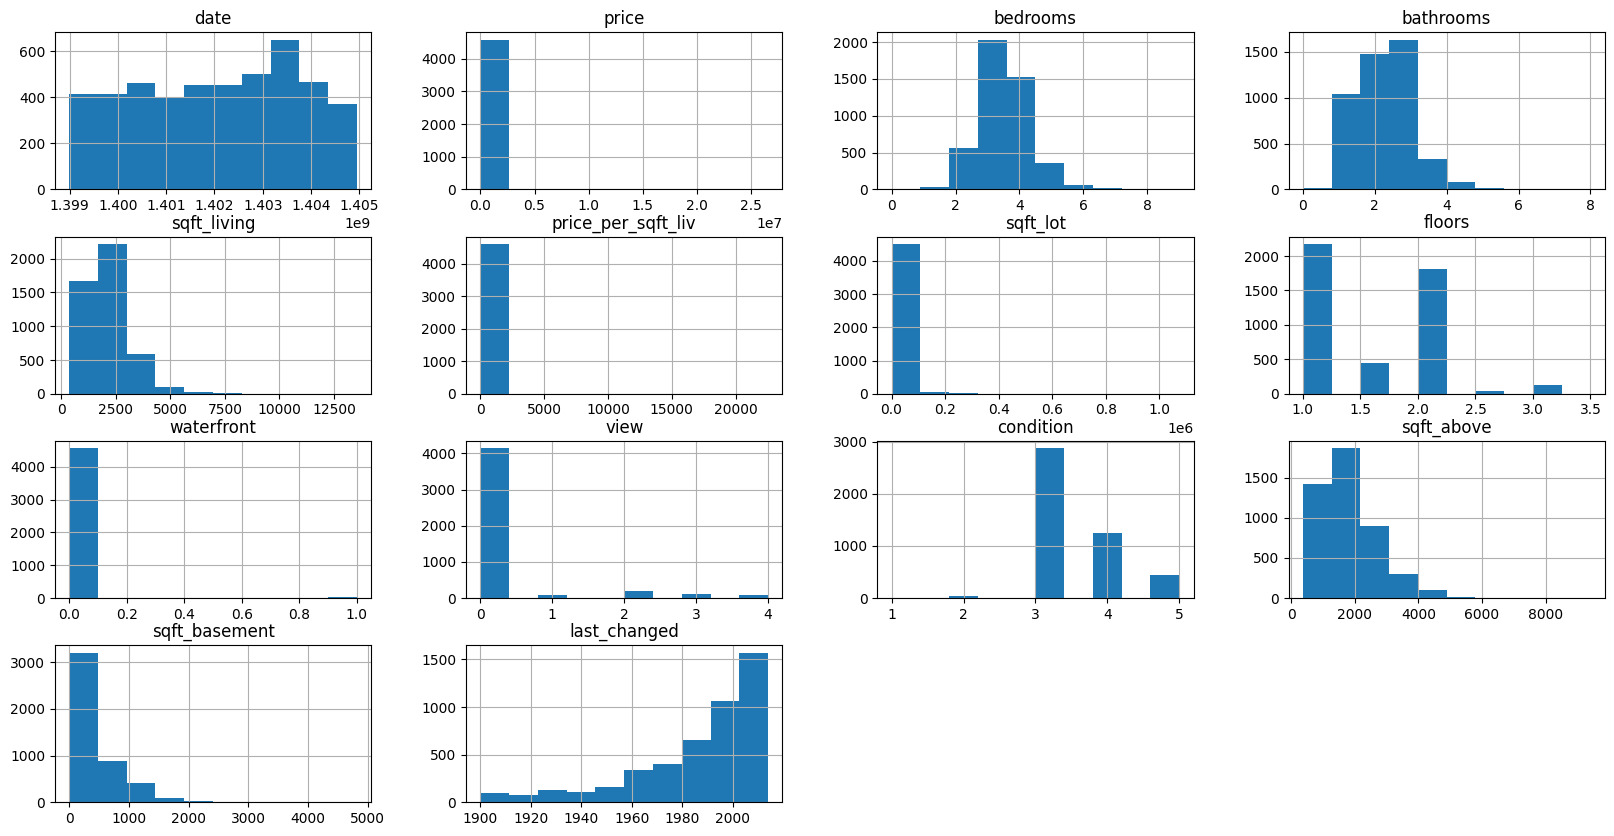

In [240]:
data.hist(figsize = (20,10))

<Axes: >

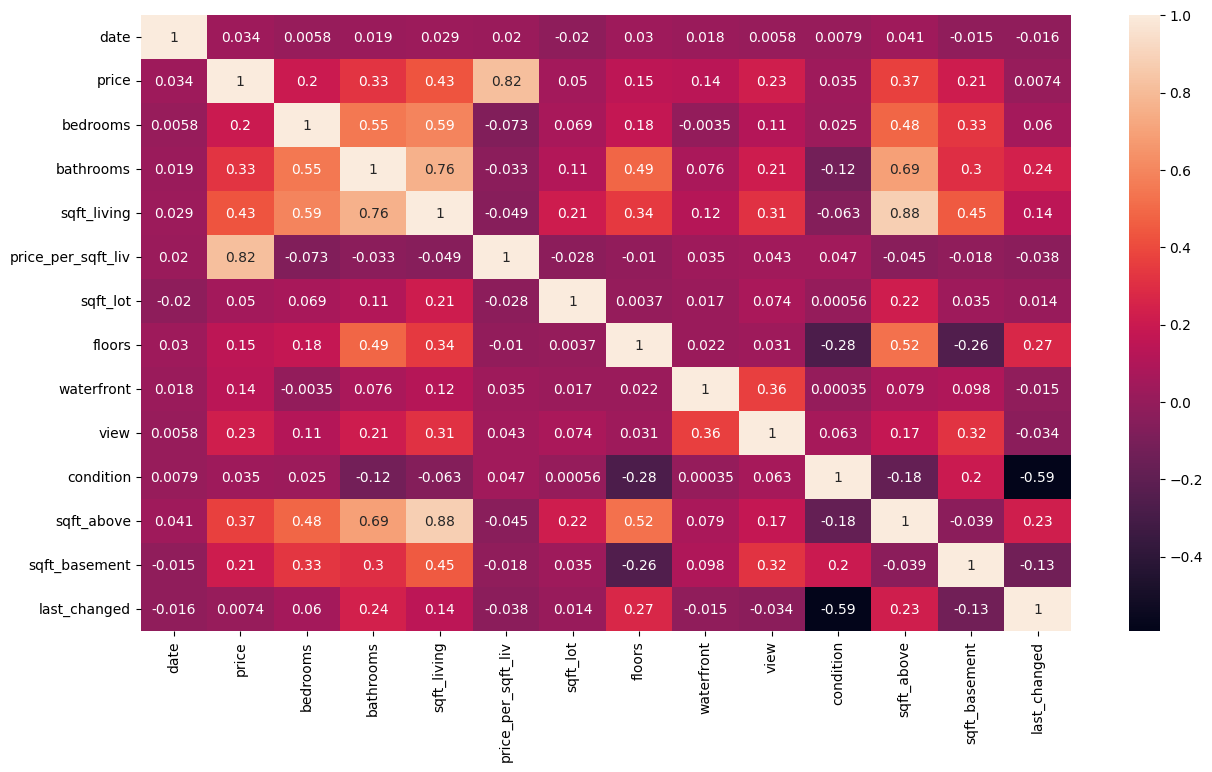

In [241]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot = True)

In [242]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['price'], axis = 1), train_data['price']
test_data = x_test.join(y_test)

test_data
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test, y_test)

0.7719779917626471